# Práctica 3: Redes neuronales Recurrentes

Las redes neuronales recurrentes, o Recurrent Neural Networks (RNN) en inglés, son una clase de redes para analizar datos de series temporales permitiendo tratar la **dimensión de “tiempo”**, que hasta ahora no habíamos considerado con las redes neuronales vistas anteriormente.

## Conceptos básicos de red neuronal recurrente

### Neurona recurrente

Hasta ahora hemos visto redes cuya función de activación solo actúa en una dirección, hacia delante, desde la capa de entrada hacia la capa de salida, es decir, que no recuerdan valores previos. Una red RNN es parecida, pero incluye conexiones que apuntan “hacia atrás”, una especie de retroalimentaciones entre las neuronas dentro de las capas.

Imaginemos la RNN más simple posible, compuesta por una sola neurona que recibe una entrada, produciendo una salida, y enviando esa salida a sí misma, como se muestra en la siguiente figura:

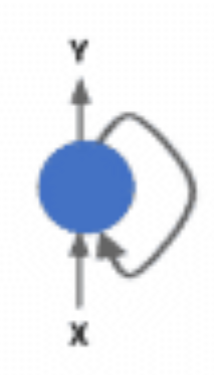

En cada instante de tiempo (también llamado timestep en este contexto), esta neurona recurrente recibe la entrada xde la capa anterior, así como su propia salida del instante de tiempo anterior para generar su salida y. Podemos representar visualmente esta pequeña red desplegada en el eje del tiempo como se muestra en la figura:

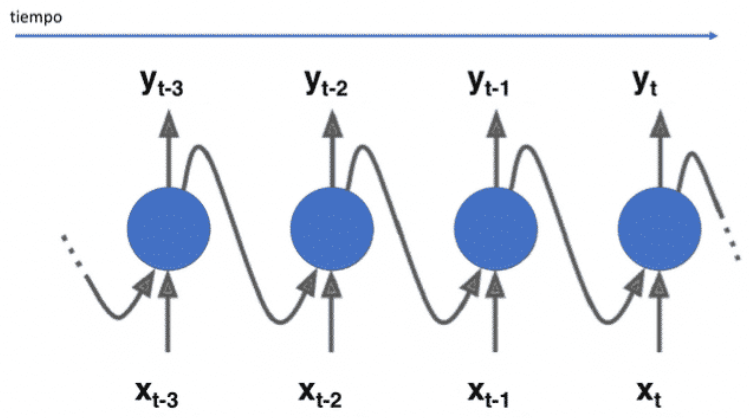

Siguiendo esta misma idea, una capa de neuronas recurrentes se puede implementar de tal manera que, en cada instante de tiempo, cada neurona recibe dos entradas, la entrada correspondiente de la capa anterior y a su vez la salida del instante anterior de la misma capa.

Ahora cada neurona recurrente tienen dos conjuntos de parámetros, uno que lo aplica a la entrada de datos que recibe de la capa anterior y otro conjunto que lo aplica a la entrada de datos correspondiente al vector salida del instante anterior.

Hay que destacar que para esta nueva conexión también se utilizarán unos nuevos pesos que se deberán ir actualizando durante la fase del entrenamiento mediante el backpropagation.

### Memory cell

Dado que la salida de una neurona recurrente en un instante de tiempo determinado es una función de entradas de los instantes de tiempo anteriores, se podría decir que una neurona recurrente tiene en cierta forma **memoria**. La parte de una red neuronal que preserva un estado a través del tiempo se suele llamar *memory cell* (o simplemente cell).

Y precisamente esta “memoria interna” es lo que hace de este tipo de redes muy adecuadas para problemas de aprendizaje automático que involucran **datos secuenciales**. Gracias a su memoria interna, las RNN pueden recordar información relevante sobre la entrada que recibieron, lo que les permite ser más precisas en la predicción de lo que vendrá después manteniendo `información de contexto` a diferencia de los otros tipos de redes que hemos visto, que no pueden recordar acerca de lo que ha sucedido en el pasado, excepto lo reflejado en su entrenamiento a través de sus pesos.

Proporcionar modelos con memoria y permitirles modelar la evolución temporal de las señales es un factor clave en muchas tareas de clasificación y traducción de secuencias en las que los RNN sobresalen, como la traducción automática, el modelado del lenguaje o el reconocimiento de voz, entre muchas otras áreas, donde la secuencia de datos y su dinámica temporal que conecta los datos a menudo es más importante que el contenido espacial (de los píxeles) de cada dato (imagen) individual.

Para ilustrar el concepto de “memoria” de una RNN, imaginemos que tenemos una red neuronal, le pasamos la palabra “neurona” como entrada y esta red procesa la palabra carácter a carácter. En el momento en que alcanza el carácter “r”, ya se ha olvidado de “n”, “e” y “u”, lo que hace que sea casi imposible para la red neuronal predecir qué letra vendrá después. Pero en cambio, una RNN permite recordar precisamente esto. Conceptualmente, la RNN tiene como entradas el presente y el pasado **reciente**. Esto es importante porque la secuencia de datos contiene información crucial para saber lo que viene a continuación.

### Long-Short Term Memory (LSTM)

Una versión bastante extendida de las RRNN son las Long-Short Term Memory(LSTM). Son una extensión de las redes neuronales recurrentes, que básicamente amplían su memoria para aprender de experiencias importantes que han pasado hace mucho tiempo.  Las LSTM permiten a las RNN recordar sus entradas durante un largo período de tiempo. Esto se debe a que LSTM contiene su información en la memoria, que puede considerarse similar a la memoria de un ordenador , en el sentido que una neurona de una LSTM puede leer, escribir y borrar información de su memoria.

Esta memoria se puede ver como una “celda” bloqueada, donde “bloqueada” significa que la célula decide si almacenar o eliminar información dentro (abriendo la puerta o no para almacenar), en función de la importancia que asigna a la información que está recibiendo. La asignación de importancia se decide a través de los pesos, que también se aprenden mediante el algoritmo. Esto lo podemos ver como que aprende con el tiempo qué información es importante y cuál no.

En una neurona LSTM hay tres puertas a estas “celdas” de información: puerta de entrada (input gate), puerta de olvidar (forget gate) y puerta de salida (output gate). Estas puertas determinan si se permite o no una nueva entrada, se elimina la información porque no es importante o se deja que afecte a la salida en el paso de tiempo actual.

Las puertas en una LSTM son análogas a una forma sigmoide, lo que significa que van de 0 a 1. El hecho de que sean análogas a una función de activación sigmoide, permite incorporarlas (matemáticamente hablando) al proceso de Backpropagation. Algunos de los problemas de las RRN básicas (los Vanishing Gradientsse por ejemplo) se resuelven a través de LSTM porque mantiene los gradientes lo suficientemente empinados y, por lo tanto, el **entrenamiento es relativamente corto y la precisión alta**.

Keras ofrece también otras implementaciones de RNN como es la Gated Recurrent Unit(GRU). Las capas GRU usan el mismo principio que LSTM, pero están simplificadas de manera que su rendimiento está a la par con LSTM pero computacionalmente son más eficientes.

### Datos de tipo texto y redes neuronales

Los modelos para NLP se entrenan a partir de un corpus lingüístico, un conjunto amplio y estructurado de ejemplos reales de uso de la lengua. En cuanto a su estructura, variedad y complejidad, un corpus debe reflejar la modalidad de la lengua de la forma más exacta posible. La idea es que representen al lenguaje de la mejor forma posible para que los modelos de NLP puedan aprender los patrones necesarios para entender el lenguaje.

Pero previamente recordemos que todas las entradas en una red neuronal deben ser tensores de datos numéricos. Cualquier dato que se necesite procesar (sonido, imágenes, texto) primero debe ser convertido en un tensor numérico, un paso llamado “vectorización” de datos (y en nuestro ejemplo previamente las letras deben ser pasadas a valores numéricos). En redes neuronales se usan dos tipos principales de vectorización: One-hot Encoding y Word Embedding.

De manera breve podríamos describir la técnica One-hot Encoding como el proceso de asociar un índice único para cada palabra y después transformar este índice en un vector binario de tamaño igual a la del vocabulario, que en el caso de datos tipo texto, todo son ceros excepto en la posición correspondiente al índice de la palabra. Aunque One-hot Encoding es simple, hay puntos débiles, por ejemplo, el tamaño que pueden llegar a tener los vectores si el vocabulario del corpus usado es muy grande.

La solución a este problema es utilizar la otra técnica Word Embedding, que en vez de crear vectores dispersos de gran tamaño, crea vectores en un espacio de menor dimensión pero que preserva las relaciones semánticas, un detalle muy importante.  Un ejemplo famoso que se usa para mostrar de manera simple el potencial de Word Embedding para explotar las relaciones semánticas es Word2Vec (un algoritmo concreto de Word Embedding), donde moviéndonos en ciertas dimensiones podemos descubrir relaciones entre ciertas palabras, por ejemplo el género. Fijémonos en la siguiente figura:

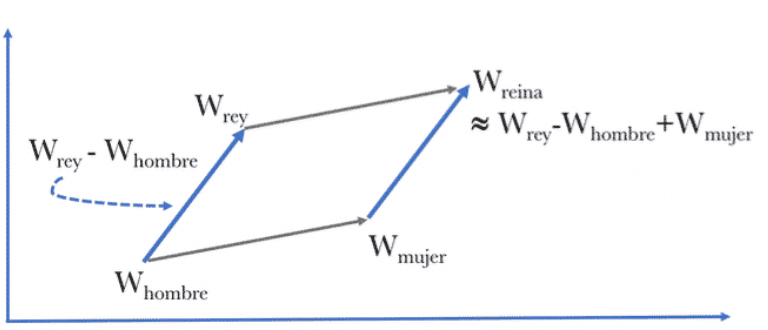

En ella se muestra que la relación algebraica de las palabras tiene un sentido semántico, una “álgebra de palabras”, por decirlo de alguna manera. Es decir, resulta que el Word Embedding correspondiente a reina es el más cercano al resultado de calcular rey – hombre + mujer.

Mientras que los vectores obtenidos a través de la codificación One-hot Encoding son binarios, dispersos (en su mayoría sus elementos son ceros) y de gran tamaño (el mismo que la cantidad de palabras en el vocabulario), los vectores obtenidos con la codificación con la técnica Word Embeddings son vectores de menor tamaño y más densos (es decir que no tienen mayoritariamente zeros).

Estos vectores que representan a las palabras codificadas con Word Embeddings pueden ser obtenidos a la vez que se entrena la red neuronal (empiezan con vectores aleatorios y luego se aprenden de la misma manera que se aprenden los pesos de una red neuronal). Pero también se pueden incorporar en el modelo estos vectores con valores ya preentrenados y no ser entrenado.  En Keras la vectorización se puede incorporar al modelo como una capa inicial de la red neuronal usando **tf.keras.layers.Embedding**.

Como hemos dicho, podemos aplicar el Deep Learning a la NLP mediante la representación de las palabras como vectores en un espacio continuo, de baja dimensión gracias a la técnica Word Embeddings. En este caso, cada palabra tenía un solo vector, independientemente del contexto en el que aparecía la palabra en el texto.  Pero esto plantea problemas con *palabras polisémicas*, por ejemplo, en las cuales todos los significados de una palabra tienen que compartir la misma representación de vector. Trabajos recientes han creado con éxito representaciones de palabras contextualizadas, es decir, vectores de palabras que son sensibles al contexto en el que aparecen.

En resumen, el desarrollo de modelos preentrenados ha surgido recientemente como un paradigma estándar en la práctica del Deep Learning para el procesamiento del lenguaje natural con ejemplos de modelos entrenados como BERT, GPT-2/3, ELMo o XLnet.

## Ejemplo: generación de texto

En este caso, trataremos de generar texto usando una RNN basada en caracteres. En este ejemplo se entrena un modelo de red neuronal para predecir el siguiente carácter a partir de una secuencia de carácteres. Con este modelo se consigue generar secuencias de texto más largas llamando al modelo repetidamente.

### Character–Level Language Models

Para intentar buscar un ejemplo lo más simple posible en el que podamos aplicar una red neuronal recurrente, vamos a usar el ejemplo de “Character level language model”.

En realidad, se trata de uno de los modelos pioneros en procesado de texto a nivel de carácter llamado char-rnn.  Consiste en darle a la RNN una palabra y se le pide que modele la distribución de probabilidad del siguiente carácter que le correspondería a la secuencia de caracteres anteriores. Con este modelo, si lo llamamos repetitivamente, podremos generar texto carácter a carácter.

Como ejemplo, supongamos que solo tenemos un vocabulario de cuatro letras posibles [“a”,”h”,”l”,”o”], y queremos entrenar a una RNN en la secuencia de entrenamiento “hola”. Esta secuencia de entrenamiento es, de hecho, una fuente de 3 ejemplos de entrenamiento por separado: La probabilidad de “o” debería ser verosímil dada el contexto de “h”, “l” debería ser verosímil en el contexto de “ho”, y finalmente “a” debería ser también verosímil dado el contexto de “hol”.

Para usar el modelo, introducimos un carácter en la RNN y obtenemos una distribución sobre qué carácter probablemente será el siguiente. Tomamos una muestra de esta distribución y la retroalimentamos para obtener el siguiente carácter. ¡Repetimos este proceso y estamos generando texto!

### Caso de estudio

Para poder ser manejable el caso de estudio a nivel explicativo en este texto, consideraremos un ejemplo muy sencillo y limitado, tanto en datos como de modelo, con el único proposito pedagógico de entender los conceptos básicos, sin poner el foco en la calidad de los resultados del modelo. Para este propósito como dataset usaremos la [primera parte del libro](https://github.com/jorditorresBCN/Deep-Learning-Introduccion-practica-con-Keras/blob/master/DeepLearning-Introduccion-practica-con-Keras-PRIMERA-PARTE.txt) (en texto plano) del que he cogido estas explicaciones.

Incluso siendo un dataset extremadamente limitado para poder ser considerado un corpus real nos sirve para generar como salida unas oraciones donde, aunque **no tienen gramaticalmente demasiado sentido**, se pueden apreciar que en algunos casos la estructura del texto de salida se asemeja a una frase real. Y esto **`teniendo en cuenta que cuando comenzó el entrenamiento, el modelo no sabía ni deletrear una palabra`**, y se ha entrenado en este dataset realmente minúsculo que además es un texto confuso al pasarlo a texto plano (al crear un corpus con la mezcla de datos y código como es el caso de este libro).

Por tanto, podemos extrapolar la potencia de esta tecnología cuando se ponen a trabajar modelos muy complejos con ingentes cantidades de datos, eso sí, requiriendo una capacidad de computación solo al alcance de unos pocos.

## Implementación en Keras

### Descarga y preprocesado de los datos

El primer paso en este ejemplo será el descargar y preparar el conjunto de datos con el que entrenaremos nuestra red neuronal:

In [2]:
import tensorflow as tf
import numpy as np
import os
import time

In [3]:
path_to_fileDL = tf.keras.utils.get_file('DL-Introduccion-practica-con-Keras-1aParte.txt', 'https://raw.githubusercontent.com/jorditorresBCN/Deep-Learning-Introduccion-practica-con-Keras/master/DeepLearning-Introduccion-practica-con-Keras-PRIMERA-PARTE.txt')  
#path_to_fileDL = tf.keras.utils.get_file('Shakespear.txt', 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespear.txt')

text = open(path_to_fileDL, 'rb').read().decode(encoding='utf-8')
print('Longitud del texto:   {} carácteres'.format(len(text)))

vocab = sorted(set(text))

print ('El texto está compuesto de estos {} carácteres:'.format(len(vocab)))
print (vocab)

212992/203286 [===============================] - 0s 0us/step
Longitud del texto:   203251 carácteres
El texto está compuesto de estos 92 carácteres:
['\n', '\r', ' ', '!', '"', '#', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xad', 'ÿ', 'Š', '‡', '…']


Como estamos tratando el caso de estudio a **nivel de carácter**, podríamos considerar que aquí el corpus son los caracteres, por tanto un corpus muy pequeño.

Recordemos que las redes neuronales solo procesan valores numéricos, no letras, por tanto tenemos que traducir los caracteres a representación numérica. Para ello crearemos dos “tablas de traducción”: una de caracteres a números y otra de números a caracteres:

In [4]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

Ahora tenemos una representación de entero (integer) para cada carácter que podemos ver ejecutando el siguiente código:

In [5]:
for char,_ in zip(char2idx, range(len(vocab))):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))

  '\n':   0,
  '\r':   1,
  ' ' :   2,
  '!' :   3,
  '"' :   4,
  '#' :   5,
  '%' :   6,
  "'" :   7,
  '(' :   8,
  ')' :   9,
  '*' :  10,
  '+' :  11,
  ',' :  12,
  '-' :  13,
  '.' :  14,
  '/' :  15,
  '0' :  16,
  '1' :  17,
  '2' :  18,
  '3' :  19,
  '4' :  20,
  '5' :  21,
  '6' :  22,
  '7' :  23,
  '8' :  24,
  '9' :  25,
  ':' :  26,
  ';' :  27,
  '<' :  28,
  '=' :  29,
  '>' :  30,
  '?' :  31,
  '@' :  32,
  'A' :  33,
  'B' :  34,
  'C' :  35,
  'D' :  36,
  'E' :  37,
  'F' :  38,
  'G' :  39,
  'H' :  40,
  'I' :  41,
  'J' :  42,
  'K' :  43,
  'L' :  44,
  'M' :  45,
  'N' :  46,
  'O' :  47,
  'P' :  48,
  'Q' :  49,
  'R' :  50,
  'S' :  51,
  'T' :  52,
  'U' :  53,
  'V' :  54,
  'W' :  55,
  'X' :  56,
  'Y' :  57,
  '[' :  58,
  ']' :  59,
  '_' :  60,
  'a' :  61,
  'b' :  62,
  'c' :  63,
  'd' :  64,
  'e' :  65,
  'f' :  66,
  'g' :  67,
  'h' :  68,
  'i' :  69,
  'j' :  70,
  'k' :  71,
  'l' :  72,
  'm' :  73,
  'n' :  74,
  'o' :  75,
  'p' :  76,

Y con esta función inversa a la anterior podemos pasar el texto (todo el libro) a enteros:

In [6]:
text_as_int = np.array([char2idx[c] for c in text])

Para comprobarlo podemos mostrar los 50 primeros caracteres del texto contenido en el tensor text_as_int:

In [7]:
print ('texto: {}'.format(repr(text[:50])))
print ('{}'.format(repr(text_as_int[:50])))

texto: 'Prologo\r\nEn 1953, Isaac Asimov publico Segunda Fun'
array([48, 78, 75, 72, 75, 67, 75,  1,  0, 37, 74,  2, 17, 25, 21, 19, 12,
        2, 41, 79, 61, 61, 63,  2, 33, 79, 69, 73, 75, 82,  2, 76, 81, 62,
       72, 69, 63, 75,  2, 51, 65, 67, 81, 74, 64, 61,  2, 38, 81, 74])


### Preparación de los datos para ser usados por la RNN

Para entrenar el modelo prepararemos unas secuencias de caracteres como entradas y salida de un tamaño determinado. En nuestro ejemplo hemos definido el tamaño de 100 caracteres con la variable *seq_length* (que podéis probar de modificar por su cuenta).

Empezamos dividiendo el texto que tenemos en secuencias de *seq_length+1* de caracteres con las cuales luego contruiremos los datos de entrenamiento compuestos por las entradas de seq_length caracteres y las salidas correspondientes que contienen la misma longitud de texto, excepto que se desplaza un carácter a la derecha. Volviendo al ejemplo de “Hola” anterior, y suponiendo un seq_length=3, la secuencia de entrada será “Hol”, y la de salida será “ola”.

Usaremos la función tf.data.Dataset.from_tensor_slices, que crea un conjunto de datos con el contenido del tensor text_as_int que contiene el texto, al que podremos aplicar el método batch() para dividir este conjunto de datos en secuencias de *seq_length+1* de índice de caracteres:

In [8]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

seq_length = 100
 
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Podemos comprobar que sequences contiene el texto dividido en paquetes de 101 caracteres como esperamos (por ejemplo mostremos las 10 primeras secuencias):

In [9]:
for item in sequences.take(10):
  print(repr(''.join(idx2char[item.numpy()])))

'Prologo\r\nEn 1953, Isaac Asimov publico Segunda Fundacion, el tercer libro de la saga de la Fundacion '
'(o el decimotercero segun otras fuentes, este es un tema de debate). En Segunda Fundacion aparece por'
' primera vez Arkady Darell, uno de los principales personajes de la parte final de la saga. En su pri'
'mera escena, Arkady, que tiene 14 anos, esta haciendo sus tareas escolares. En concreto, una redaccio'
'n que lleva por titulo ?El Futuro del Plan Sheldon?. Para hacer la redaccion, Arkady esta utilizando '
'un ?transcriptor?,un dispositivo que convierte su voz en palabras escritas. Este tipo de dispositivo,'
' que para Isaac Asimov era ciencia ficcion en 1953, lo tenemos al alcance de la mano en la mayoria de'
' nuestros smartphones, y el Deep Learning es uno de los responsables de que ya tengamos este tipo de '
'aplicaciones, siendo la tecnologia otro de ellos.En la actualidad disponemos de GPUs (Graphics Proces'
'sor Units), que solo cuestan alrededor de 100 euros, que esta

De esta secuencia se obtiene el conjunto de datos de training que contenga tanto los datos de entrada (desde la posición 0 a la 99) como los datos de salida (desde la posición 1 a la 100). Para ello se crea una función que realiza esta tarea y se aplica a todas las secuencias usando el método map() de la siguiente forma:

In [10]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

En este punto, dataset contiene un conjunto de parejas de secuencias de texto (con la representación numérica de los caracteres), donde el primer componente de la pareja contiene un paquete con una secuencia de 100 caracteres del texto original y la segunda su correspondiente salida, también de 100 caracteres. Podemos comprobarlo visualizándolo por pantalla (por ejemplo mostrando la primera pareja):

In [11]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'Prologo\r\nEn 1953, Isaac Asimov publico Segunda Fundacion, el tercer libro de la saga de la Fundacion'
Target data: 'rologo\r\nEn 1953, Isaac Asimov publico Segunda Fundacion, el tercer libro de la saga de la Fundacion '


En este punto del código disponemos de los datos de entrenamiento en el tensor dataset en forma de parejas de secuencias de 100 integers de 64 bits que representan un carácter del vocabulario:

In [12]:
print (dataset)

<MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>


En realidad los datos ya están preprocesados en el formato que se requiere para ser usados en el entreno de la red neuronal, pero recordemos que en redes neuronales los datos se agrupan en batches antes de pasarlos al modelo. En nuestro caso hemos decidido un tamaño de batch de 64, que facilita la explicación. Este es un hiperparámetro importante de ajustar correctamente teniendo en cuenta diferentes factores, como el tamaño de la memoria disponible, por poner un ejemplo. En este código, para crear los batches de parejas de secuencias hemos considerado usar tf.data que además nos permite barajar las secuencias previamente:

In [13]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print (dataset)

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>


Recapitulando, ahora en el tensor dataset disponemos de los datos de entrenamiento ya listos para ser usados para entrenar el modelo: batches compuestos de 64 parejas de secuencias de 100 integers de 64 bits que representan el carácter correspondiente en el vocabulario.

### Construcción del modelo RNN

Para construir el modelo usaremos tf.keras.Sequential que ya conocemos. Usaremos una versión mínima de RNN para facilitar la explicación, que contenga solo una capa LSTM. En concreto definimos una red de solo 3 capas:

In [14]:
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

In [15]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  
  model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim,batch_input_shape=[batch_size, None]),
                tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
                tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [16]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

La primera capa es de tipo Word Embedding, que mapea cada carácter de entrada en un vector Embedding. Esta capa tf.keras.layers.Embedding permite especificar varios argumentos que se pueden consultar en todo detalle en el [manual de Keras](https://keras.io/api/layers/core_layers/embedding/).

En nuestro caso el primero que especificamos es el tamaño del vocabulario, indicado con el argumento vocab_size, que indica cuantos vectores Embedding tendrá la capa.  A continuación indicamos las dimensiones de estos vectores Embedding mediante el argumento embedding_dim, que en nuestro caso hemos decidido que sea 256.  Finalmente se indica el tamaño del batch que usaremos para entrenar, en nuestro caso 64.

La segunda capa es de tipo LSTM introducida anteriormente. Esta capa tf.keras.layers.LSTM tiene varios argumentos posibles que se pueden consultar en el [manual de Keras](https://keras.io/api/layers/recurrent_layers/lstm/), aquí solo usaremos algunos y dejamos los valores por defecto del resto. Quizás el más importante es el número de neuronas recurrentes que se indica con el argumento units y que en nuestro caso hemos decidido que sea 1024 neuronas.

Con return_sequence se indica que queremos predecir el carácter siguiente a todos los caracteres de entrada, no solo el siguiente al último carácter.

El argumento stateful indica, explicado de manera simple, el uso de las capacidades de memoria de la red entre batches. Si este argumento está instanciado a false se indica que a cada nuevo batch se inicializan las memory cells comentadas anteriormente, mientras que si está a true se está indicando para cada batch se mantendrán las actualizaciones hechas durante la ejecución del bach anterior.

El último argumento que usamos es recurrent_kernel, donde indicamos cómo se deben inicializar los pesos de las matrices internas de la red. En este caso usamos la distribución uniforme glorot_uniform, habitual en estos casos.

Finalmente la última capa es de tipo Dense. Aquí es importante el argumento units que nos dice cuantas neuronas tendrá la capa y que nos marcará la dimensión de la salida. En nuestro caso será igual al tamaño de nuestro vocabulario (vocab_size).

Como siempre, es interesante usar el método summary() para visualizar la estructura del modelo:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           23552     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 92)            94300     
                                                                 
Total params: 5,364,828
Trainable params: 5,364,828
Non-trainable params: 0
_________________________________________________________________


Podemos comprobar que la capa LSTM consta de muchos parámetros (más de 5 millones) como era de esperar. Intentemos analizar un poco más esta red neuronal. Para cada carácter de entrada (transformado a su equivalente numérico), el modelo busca su vector de Embedding correspondiente y luego ejecuta la capa LSTM con este vector Embedding como entrada. A la salida de la LSTM aplica la capa Dense para decidir cual es el siguiente carácter.

Inspeccionemos las dimensiones de los tensores para poder comprender más a fondo el modelo. Fijemonos en el primer batch del conjunto de datos de entrenamiento y observemos su forma:

In [18]:
for input_example_batch, target_example_batch in dataset.take(1):
  print("Input:", input_example_batch.shape, "# (batch_size, sequence_length)")
  print("Target:", target_example_batch.shape, "# (batch_size, sequence_length)")

Input: (64, 100) # (batch_size, sequence_length)
Target: (64, 100) # (batch_size, sequence_length)


Vemos que en esta red la secuencia de entrada son batch de 100 caracteres, pero el modelo una vez entrenado puede ser ejecutado con cualquier tamaño de cadena de entrada. Este es un detalle al que luego volveremos.

Como salida el modelo nos devuelve un tensor con una dimensión adicional con la verosimilitud para cada carácter del vocabulario:

In [19]:
for input_example_batch, target_example_batch in dataset.take(1):  
    example_batch_predictions = model(input_example_batch)
    print("Prediction: ", example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

Prediction:  (64, 100, 92) # (batch_size, sequence_length, vocab_size)


El siguiente paso es elegir uno de los caracteres. Sin entrar en detalle, no se eligirá el carácter más “probable” (mediante argmax) puesto que el modelo puede entrar en un bucle. Lo que se hará es obtener una muestra de la distribución de salida. Pruébalo para el primer ejemplo en el batch:

In [20]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices_characters = tf.squeeze(sampled_indices,axis=-1).numpy()
print(sampled_indices_characters)

[58 54 81 88 44 77 35 46  8  3 59 87 17 11 42 63 47  7 28 87 38 23 89 40
 70 47 12 87 62  5 72 76 37 60 16 15 75 81 65 11 84 71 44 73 29 67  5 69
 89 31 70 70 50 13 76 14 47 73 64  3 53 58 57 49 83 58 41 89 45 61 27 29
 71 71  0 32 33  3 24 22 54 44 90 57 26 26  2 14 83 85 91 50 89 84 70 33
 46 70 77 58]


Con tf.random.categorical se obtiene una muestra de una distribución categórica y con squeeze se elimina la dimensiones del tensor de tamaño 1. De esta manera en cada instante de tiempo se obtiene una predicción del índice del siguiente carácter.

### Entrenamiento del modelo RNN

En este punto, el problema puede tratarse como un problema de clasificación estándar para el que debemos definir la función de Loss y el optimizador.

Para la función de Loss usaremos la función estándar tf.keras.losses.sparse_categorical_crossentropy dado que estamos considerando datos categóricos. Dado que el retorno hemos visto que se trata de unos valores de verisimilitud (no de probabilidades como si hubiéramos ya aplicado softmax) se instanciará el argumento from_logits a True.

In [21]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

En cuanto al optimizador usaremos tf.keras.optimizers.Adam con los argumentos por defecto del optimizador Adam.

Con esta función de loss definida y usando el optimizador Adam con sus argumentos por defecto, ya podemos llamar al método compile() de la siguiente manera:

In [22]:
model.compile(optimizer='adam', loss=loss)

En este ejemplo aprovecharemos para usar los Checkpoints, una técnica de tolerancia de fallos para procesos cuyo tiempo de ejecución es muy largo. La idea es guardar una instantánea del estado del sistema periódicamente para recuperar desde ese punto la ejecución en caso de fallo del sistema.  En nuestro caso, cuando entrenamos modelos Deep Learning, el Checkpoint lo forman básicamente los pesos del modelo. Estos Checkpoint se pueden usar también para hacer predicciones tal cual como haremos en este ejemplo.

La librería de Keras proporciona Checkpoints a través de la API Callbacks. Concretamente usaremos tf.keras.callbacks.ModelCheckpoint para especificar cómo salvar los Checkpoints a cada epoch durante el entrenamiento, a través de un argumento en el método fit() del modelo.

En el código debemos especificar el directorio en el que se guardarán los Checkpoints que salvaremos y el nombre del fichero (que le añadiremos el número de epoch para nuestra comodidad):

In [23]:
 # directorio
checkpoint_dir = './training_checkpoints'
# nombre fichero
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

Ahora ya está todo preparado para empezar a entrenar la red con el método fit():

In [24]:
EPOCHS=25
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/25
31/31 [==============================] - 50s 2s/step - loss: 3.2285
Epoch 2/25
31/31 [==============================] - 50s 2s/step - loss: 2.7748
Epoch 3/25
31/31 [==============================] - 49s 2s/step - loss: 2.4264
Epoch 4/25
31/31 [==============================] - 50s 2s/step - loss: 2.2101
Epoch 5/25
31/31 [==============================] - 49s 2s/step - loss: 2.0867
Epoch 6/25
31/31 [==============================] - 50s 2s/step - loss: 1.9674
Epoch 7/25
31/31 [==============================] - 49s 2s/step - loss: 1.8402
Epoch 8/25
31/31 [==============================] - 48s 2s/step - loss: 1.7217
Epoch 9/25
31/31 [==============================] - 49s 2s/step - loss: 1.6115
Epoch 10/25
31/31 [==============================] - 49s 2s/step - loss: 1.5081
Epoch 11/25
31/31 [==============================] - 49s 2s/step - loss: 1.4157
Epoch 12/25
31/31 [==============================] - 50s 2s/step - loss: 1.3375
Epoch 13/25
31/31 [==============================

### Generación de texto usando el modelo RNN

Ahora que tenemos ya entrenado el modelo pasemos a usarlo para generar texto. Para mantener este paso de predicción simple, vamos a usar un tamaño de batch de 1. Debido a la forma en que se pasa el estado de la RNN de un instante de tiempo al siguiente, el modelo solo acepta un tamaño de batch fijo una vez construido. Por ello, para poder ejecutar el modelo con un tamaño de batch diferente, necesitamos reconstruir manualmente el modelo con el método build() del modelo y restaurar sus pesos desde el Checkpoints (cogemos el ultimo con tf.train.latest_checkpoint()):

In [25]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

# Cargamos los valores de los pesos después del último checkpoint (al finalizar el entrenamiento)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

Ahora que tenemos el modelo entrenado y preparado para usar, generaremos texto a partir de una palabra de partida con el siguiente código:

In [26]:
def generate_text(model, start_string):

  num_generate = 500
  input_eval = [char2idx[s] for s in start_string]

  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []

  temperature = 0.5

  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      
      predictions = tf.squeeze(predictions, 0)

      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()


      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

El código empieza con inicializaciones como: definir el número de caracteres a predecir con la variable num_generate, convertir la palabra inicial (start_string) a su correspondiente representación numérica y preparan lo tensores necesarios:

```
  num_generate = 500
  input_eval = [char2idx[s] for s in start_string]

  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []
```

Usando la misma idea del código original char-rnn, se usa una variable temperature para decidir cómo de conservador en sus predicciones queremos que se comporte nuestro modelo. En nuestro ejemplo la hemos inicializado a 0.5:

```
  temperature = 0.5
```

Con “temperaturas altas” (hasta 1) se permitirá más creatividad al modelo para generar texto pero a costa de más errores (por ejemplo, errores ortográficos, etc.). Mientras que con “temperaturas bajas” habrá menos errores pero el modelo mostrará poca creatividad. Propongo que probéis con diferentes valores y ver su efecto. Incluso os propongo que useis el dataset Shakespeare.txt (de tamaño mucho mayor que el presentado en este ejemplo) que Andrey Karpathy usa en su ejemplo original de char-rnn.

A partir de este momento empieza el bucle para generar los caracteres que le hemos indicado (que usa el carácter de entrada la primera vez) y luego sus própias predicciones como entrada a cada iteración al modelo RNN:

```
  for i in range(num_generate):
      predictions = model(input_eval)
```

Recordemos que estamos en un batch de 1 pero el modelo retorna el tensor del batch con las dimensiones que lo habíamos entrenado y por tanto debemos reducir la dimensión batch:

```
  predictions = tf.squeeze(predictions, 0)
```

Luego, se usa una distribución categórica para calcular el índice del carácter predicho:
```
  predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
```

Este carácter acabado de predecir se usa como nuestra próxima entrada al modelo, retroalimentando el modelo para que ahora tenga más contexto (en lugar de una sola letra). Después de predecir la siguiente letra, se retroalimenta nuevamente, y así sucesivamente de manera que es cómo aprende a medida que se obtiene más contexto de los carácteres predichos previamente:

```
  input_eval = tf.expand_dims([predicted_id], 0)
  
  text_generated.append(idx2char[predicted_id])
```

Ahora que se ha descrito cómo se ha programado la función generate_txt probemos cómo se comporta el modelo.

Empecemos con una palabra que no conoce el corpus, por ejemplo “Alcohol”, que nada tiene que ver con Deep Learning por lo que no sale en el texto presentado durante el entrenamiento:

In [27]:
print(generate_text(model, start_string=u"Alcohol "))

Alcohol con el argumento en los conceptos de datos para el tema,  despues de ello se llega a la capa de convolucion y por eso se ha competicion de una red neuronal convolucional y puede ser usar de esta relacion en la segunda capa de pooling, que la tener el proceso de entrenamiento con el capitulo anterior en esta capa de nourona adicional como ?erroy) es una capa densamente conectadas de datos para el tema y el algoritmo de aprendizaje se comporta redes neuronales densamente conectadas y los conceptos


Como vemos el modelo no es capaz de generar ningún texto que tenga ningún parecido a un posible texto relacionado con el tema.

Probemos ahora con una palabra como “modelo” o “activación” a ver que pasa:

In [28]:
print(generate_text(model, start_string=u"modelo"))

modelos en comparacion de validacion de parametros (es capitulo, se esta progande mas de una comparacion de Deep Learning con sistemas de activacion softmax, en la libreria de Keras es una libreria de Keras esta inicializacion de los estructuras algunos de los parametros que podemos elegir el codigo especificar el tema considerado como se representa en la red (especificacion de aplicaciones de una matriz de confusion se propone in conseguir esta libreria en el momento de escribir este libro y probario


In [29]:
print(generate_text(model, start_string=u"activacion"))

activacion de las capas es decir que las capas componentes de imagenes y 24?24 neuronas de la capa convolucional y una capa de entrada de la computacion y los valores de los parametros de la red neuronal convolucional como la interactividad de representar como se conseguir esta matriz de confusion como mas de GPU sin embresado la imagen de entrada de la segunda capa de entrada de la loss es componentes y convolucionales es la loss a converier este ejemplo de entrada de la capa oculta que tendemos en este 


En resumen, el modelo presentado parece que ha aprendido a generar texto de manera interesante, teniendo en cuenta el reducido dataset inicial con el que se ha entrenado. Como propuesta, tratad de hacer pruebas con otros conjuntos de datos de tipo texto. Por ejemplo en el artículo [“The Unreasonable Effectiveness of Recurrent Neural Network” del blog de Andrey Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) podéis encontrar varios ejemplos de datos de tipo texto que podréis usar directamente simplemente cambiando la URL del fichero de texto de entrada al código propuesto en este ejemplo.

Hasta aquí un ejemplo muy simple pero que espero que haya sido útil para comprender la idea que hay detrás de las redes neuronales recurrentes. Es sin duda una de las áreas de investigación más activas en Deep Learning en estos momentos. Pero también es un área que genera mucho debate, al poderse crear sistemas que escriben prosa de manera convincente como el presentado por OpenAI (GPT-3). Un modelo entrenado con miles de millones de palabras para poder crear artículos “creibles”, que muestra cómo estos algoritmos podrían usarse para engañar a las personas a gran escala, automatizando por ejemplo la generación de noticias falsas en redes sociales.